In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statsmodels.api as sm


In [35]:
df1 = pd.read_csv('d2.csv')
df1 = df1.dropna()


In [65]:
df1.head()

,Unnamed: 0,Away team,Home team,Year,week,Awayscore,Homescore,Nethomepoints,Spread,Aappg,...,O_bet_3,Wu_bet_3,O_bet_5,Wu_bet_5,O_win_3,Wu_win_3,O_win_5,Wu_win_5,Away,Home
0,3,3.0,12.0,1992.0,1.0,3.0,14.0,11.0,5.0,0.0,...,H,0,H,0,W,N,W,N,CLE,IND
1,4,7.0,25.0,1992.0,1.0,21.0,3.0,-18.0,-4.0,0.0,...,0,0,0,0,N,N,N,N,CIN,SEA
2,5,10.0,6.0,1992.0,1.0,24.0,27.0,3.0,-3.5,0.0,...,0,0,0,0,N,N,N,N,DET,CHI
3,6,14.0,24.0,1992.0,1.0,24.0,10.0,-14.0,2.5,0.0,...,H,0,H,0,L,N,L,N,KAN,SDG
4,7,16.0,11.0,1992.0,1.0,23.0,20.0,-3.0,5.5,0.0,...,H,H,H,H,W,W,W,W,MIN,GNB


In [77]:
x = df1[["DAappg", "DAappga", "DAappg", "DHappga"]]
y = df1["Nethomepoints"]

,DAappg,DAappga,DAappg,DHappga
0,19.868243,20.446400,19.868243,21.286291
1,18.982287,21.832726,18.982287,20.071990
2,21.226710,20.416042,21.226710,20.152944
3,20.724668,19.980918,20.724668,20.891643
4,20.104498,20.527353,20.104498,20.598187
...,...,...,...,...
2561,18.532273,19.427907,18.532273,21.330394
2562,19.358667,17.623769,19.358667,17.869933
2563,18.281562,19.405827,18.281562,18.496237
2564,19.883562,19.084648,19.883562,22.423641


In [78]:
model = sm.OLS(y,x)

In [ ]:
fit = model

In [36]:
filter_1 = 3
filter_2 = 5
df1['O_difference_3'] = 0
df1['Wu_difference_3'] = 0
df1['O_difference_5'] = 0
df1['Wu_difference_5'] = 0


In [37]:
df1['Spread_flipp'] = -df1['Spread']

In [38]:
for i in range(2566):
    if (abs(df1['Spread_flipp'].iloc[i]-df1['OsbournM'].iloc[i])>filter_1):
        df1.loc[i, 'O_difference_3'] = 1
    else:
        df1.loc[i, 'O_difference_3'] = 0

In [39]:
for i in range(2566):
    if (abs(df1['Spread_flipp'].iloc[i]-df1['WuM'].iloc[i])>filter_1):
        df1.loc[i,'Wu_difference_3'] = 1
    else:
        df1.loc[i,'Wu_difference_3'] = 0

In [40]:
for i in range(2566):
    if (abs(df1['Spread_flipp'].iloc[i]-df1['OsbournM'].iloc[i])>filter_2):
        df1.loc[i, 'O_difference_5'] = 1
    else:
        df1.loc[i, 'O_difference_5'] = 0

In [41]:
for i in range(2566):
    if (abs(df1['Spread_flipp'].iloc[i]-df1['WuM'].iloc[i])>filter_2):
        df1.loc[i,'Wu_difference_5'] = 1
    else:
        df1.loc[i,'Wu_difference_5'] = 0

In [42]:
df1['O_bet_3'] = 0
df1['Wu_bet_3'] = 0
df1['O_bet_5'] = 0
df1['Wu_bet_5'] = 0


In [43]:
for i in range(2566):
    if (df1.loc[i, 'O_difference_3'] == 1):
        if(df1.loc[i, 'OsbournM'] - df1.loc[i, 'Spread_flipp'] > 0):
            df1.loc[i, 'O_bet_3'] = "H"
        else:
            df1.loc[i, 'O_bet_3'] = "V"
    else:
        df1.loc[i, 'O_bet_3'] = "0"

In [44]:
for i in range(2566):
    if (df1.loc[i, 'Wu_difference_3'] == 1):
        if(df1.loc[i, 'WuM'] - df1.loc[i, 'Spread_flipp'] > 0):
            df1.loc[i, 'Wu_bet_3'] = "H"
        else:
            df1.loc[i, 'Wu_bet_3'] = "V"
    else:
        df1.loc[i, 'Wu_bet_3'] = "0"

In [45]:
for i in range(2566):
    if (df1.loc[i, 'O_difference_5'] == 1):
        if(df1.loc[i, 'OsbournM'] - df1.loc[i, 'Spread_flipp'] > 0):
            df1.loc[i, 'O_bet_5'] = "H"
        else:
            df1.loc[i, 'O_bet_5'] = "V"
    else:
        df1.loc[i, 'O_bet_5'] = "0"

In [46]:
for i in range(2566):
    if (df1.loc[i, 'Wu_difference_5'] == 1):
        if(df1.loc[i, 'WuM'] - df1.loc[i, 'Spread_flipp'] > 0):
            df1.loc[i, 'Wu_bet_5'] = "H"
        else:
            df1.loc[i, 'Wu_bet_5'] = "V"
    else:
        df1.loc[i, 'Wu_bet_5'] = "0"

In [47]:
df1['O_win_3'] = 0
df1['Wu_win_3'] = 0
df1['O_win_5'] = 0
df1['Wu_win_5'] = 0

In [48]:
for i in range(2566):
    if df1.loc[i, 'O_bet_3'] == '0':
        df1.loc[i, 'O_win_3'] = 'N'
    elif df1.loc[i, 'O_bet_3'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'O_win_3'] = 'W'
    elif df1.loc[i, 'O_bet_3'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'O_win_3'] = 'L'    
    elif df1.loc[i, 'O_bet_3'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'O_win_3'] = 'W'
    elif df1.loc[i, 'O_bet_3'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'O_win_3'] = 'L'

In [49]:
for i in range(2566):
    if df1.loc[i, 'Wu_bet_3'] == '0':
        df1.loc[i, 'Wu_win_3'] = 'N'
    elif df1.loc[i, 'Wu_bet_3'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'Wu_win_3'] = 'W'
    elif df1.loc[i, 'Wu_bet_3'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'Wu_win_3'] = 'L'    
    elif df1.loc[i, 'Wu_bet_3'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'Wu_win_3'] = 'W'
    elif df1.loc[i, 'Wu_bet_3'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'Wu_win_3'] = 'L'

In [50]:
for i in range(2566):
    if df1.loc[i, 'O_bet_5'] == '0':
        df1.loc[i, 'O_win_5'] = 'N'
    elif df1.loc[i, 'O_bet_5'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'O_win_5'] = 'W'
    elif df1.loc[i, 'O_bet_5'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'O_win_5'] = 'L'    
    elif df1.loc[i, 'O_bet_5'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'O_win_5'] = 'W'
    elif df1.loc[i, 'O_bet_5'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'O_win_5'] = 'L'

In [51]:
for i in range(2566):
    if df1.loc[i, 'Wu_bet_5'] == '0':
        df1.loc[i, 'Wu_win_5'] = 'N'
    elif df1.loc[i, 'Wu_bet_5'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'Wu_win_5'] = 'W'
    elif df1.loc[i, 'Wu_bet_5'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'Wu_win_5'] = 'L'    
    elif df1.loc[i, 'Wu_bet_5'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'Wu_win_5'] = 'W'
    elif df1.loc[i, 'Wu_bet_5'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'Wu_win_5'] = 'L'

In [52]:
for i in range(2566):
    if df1.loc[i, 'O_win_3'] == '0' or df1.loc[i, 'O_win_3'] == 0:
        df1.loc[i, 'O_win_3'] == 'N'

In [53]:
for i in range(2566):
    if df1.loc[i, 'Wu_win_3'] == '0' or df1.loc[i, 'Wu_win_3'] == 0:
        df1.loc[i, 'Wu_win_3'] == 'N'

In [54]:
for i in range(2566):
    if df1.loc[i, 'O_win_5'] == '0' or df1.loc[i, 'O_win_5'] == 0:
        df1.loc[i, 'O_win_5'] == 'N'

In [55]:
for i in range(2566):
    if df1.loc[i, 'Wu_win_5'] == '0' or df1.loc[i, 'Wu_win_5'] == 0:
        df1.loc[i, 'Wu_win_5'] == 'N'

<Axes: xlabel='Wu_win_5', ylabel='count'>

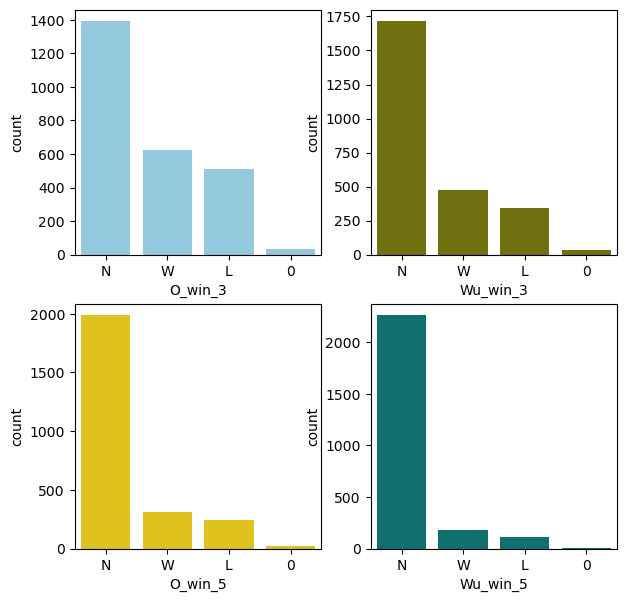

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.countplot(data = df1, x = 'O_win_3', color="skyblue", ax=axs[0, 0], order=df1['O_win_3'].value_counts().index)
sns.countplot(data = df1, x = 'Wu_win_3', color="olive", ax=axs[0, 1], order=df1['Wu_win_3'].value_counts().index)
sns.countplot(data = df1, x = 'O_win_5', color="gold", ax=axs[1, 0], order=df1['O_win_5'].value_counts().index)
sns.countplot(data = df1, x = 'Wu_win_5', color="teal", ax=axs[1, 1], order=df1['Wu_win_5'].value_counts().index)

In [57]:
df1

,Unnamed: 0,Away team,Home team,Year,week,Awayscore,Homescore,Nethomepoints,Spread,Aappg,...,Wu_difference_5,Spread_flipp,O_bet_3,Wu_bet_3,O_bet_5,Wu_bet_5,O_win_3,Wu_win_3,O_win_5,Wu_win_5
0,3,3.0,12.0,1992.0,1.0,3.0,14.0,11.0,5.0,0.000000,...,0,-5.0,H,0,H,0,W,N,W,N
1,4,7.0,25.0,1992.0,1.0,21.0,3.0,-18.0,-4.0,0.000000,...,0,4.0,0,0,0,0,N,N,N,N
2,5,10.0,6.0,1992.0,1.0,24.0,27.0,3.0,-3.5,0.000000,...,0,3.5,0,0,0,0,N,N,N,N
3,6,14.0,24.0,1992.0,1.0,24.0,10.0,-14.0,2.5,0.000000,...,0,-2.5,H,0,H,0,L,N,L,N
4,7,16.0,11.0,1992.0,1.0,23.0,20.0,-3.0,5.5,0.000000,...,1,-5.5,H,H,H,H,W,W,W,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,2564,16.0,30.0,1993.0,18.0,14.0,9.0,-5.0,8.0,17.533333,...,1,-8.0,H,H,H,H,W,W,W,W
2562,2565,20.0,29.0,1993.0,18.0,0.0,24.0,24.0,-3.5,18.000000,...,0,3.5,0,0,0,0,N,N,N,N
2563,2566,22.0,26.0,1993.0,18.0,37.0,34.0,-3.0,-12.0,17.066667,...,0,12.0,V,0,0,0,W,N,N,N
2564,2567,24.0,28.0,1993.0,18.0,32.0,17.0,-15.0,1.0,19.333333,...,0,-1.0,0,V,0,0,N,W,N,N


In [58]:
#df1.to_excel("df.xlsx")


In [59]:
O3_win = 0
O3_lose = 0
for i in range (2566):
    if df1.loc[i, 'O_win_3'] == 'W':
        O3_win += 1
    elif df1.loc[i, 'O_win_3'] == 'L':
        O3_lose += 1
        
O3_percentage = (O3_win)/(O3_win+O3_lose)
O3_percentage 

0.5492091388400703

In [60]:
team = pd.read_excel('team.xlsx')
team2 = pd.read_excel('team2.xlsx')
team2

,Home team,Home
0,1,ARZ
1,2,ATL
2,3,CLE
3,4,BFL
4,5,CAR
5,6,CHI
6,7,CIN
7,8,DAL
8,9,DEN
9,10,DET


In [61]:
df1 = df1.merge(team, on='Away team', how='left')

In [62]:
df1 = df1.merge(team2, on='Home team', how='left')

In [63]:
df1

,Unnamed: 0,Away team,Home team,Year,week,Awayscore,Homescore,Nethomepoints,Spread,Aappg,...,O_bet_3,Wu_bet_3,O_bet_5,Wu_bet_5,O_win_3,Wu_win_3,O_win_5,Wu_win_5,Away,Home
0,3,3.0,12.0,1992.0,1.0,3.0,14.0,11.0,5.0,0.000000,...,H,0,H,0,W,N,W,N,CLE,IND
1,4,7.0,25.0,1992.0,1.0,21.0,3.0,-18.0,-4.0,0.000000,...,0,0,0,0,N,N,N,N,CIN,SEA
2,5,10.0,6.0,1992.0,1.0,24.0,27.0,3.0,-3.5,0.000000,...,0,0,0,0,N,N,N,N,DET,CHI
3,6,14.0,24.0,1992.0,1.0,24.0,10.0,-14.0,2.5,0.000000,...,H,0,H,0,L,N,L,N,KAN,SDG
4,7,16.0,11.0,1992.0,1.0,23.0,20.0,-3.0,5.5,0.000000,...,H,H,H,H,W,W,W,W,MIN,GNB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,2564,16.0,30.0,1993.0,18.0,14.0,9.0,-5.0,8.0,17.533333,...,H,H,H,H,W,W,W,W,MIN,WAS
2562,2565,20.0,29.0,1993.0,18.0,0.0,24.0,24.0,-3.5,18.000000,...,0,0,0,0,N,N,N,N,NYJ,HOU
2563,2566,22.0,26.0,1993.0,18.0,37.0,34.0,-3.0,-12.0,17.066667,...,V,0,0,0,W,N,N,N,PHI,SFO
2564,2567,24.0,28.0,1993.0,18.0,32.0,17.0,-15.0,1.0,19.333333,...,0,V,0,0,N,W,N,N,SDG,TAM
